In [121]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [122]:
# 이미지 로드 및 전처리
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)  # 배치 차원 추가

In [123]:
# Upsampling (Nearest Neighbor)
# 이미지 or 특성 맵을, scale_factor에 따라 해상도 확대

def upsample_image(image, scale_factor):  # scale_factor=2 가로와 세로 각각 2배로 확대
    upsample = nn.Upsample(scale_factor=scale_factor, mode='nearest')
    return upsample(image)

# nn.Upsample 모듈 사용 이미지 확대
# nearest 모드 사용. 가장 가까운 픽셀 값 복사, 이미지 확대

In [124]:
# Transposed Convolution
# Convolution과 반대 과정 -> 입력 이미지의 해상도 확대
  # 입력 이미지에 컨볼루션 필터를 적용해 특징 맵을 생성 -> 이 특징 맵을 다시 원래 크기 또는 그 이상으로 복원


def transposed_conv_image(image, scale_factor, kernel_size, stride):
    channels, height, width = image.size(1), image.size(2), image.size(3)
    conv_transpose = nn.ConvTranspose2d(channels, channels, kernel_size=kernel_size, stride=stride)
    return conv_transpose(image)

# nn.ConvTranspose2d 모듈 사용 이미지 확대
# 커널 크기와 스트라이드 설정, 확대된 이미지 생성

# scale_factor 이미지 확대 비율 ... stride와
# kernel_size  필터 크기 <- 이미지의 특정 부분을 얼마나 확대할지 결정
# channels: 채널 수


In [125]:
# 시각화 
def show_images(original, upsampled, transposed):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original.squeeze().permute(1, 2, 0).detach().numpy()) # Detach from graph
    axes[0].set_title("Original Image")

    axes[1].imshow(upsampled.squeeze().permute(1, 2, 0).detach().numpy()) # Detach from graph
    axes[1].set_title("Upsampled Image (Nearest Neighbor)")

    axes[2].imshow(transposed.squeeze().permute(1, 2, 0).detach().numpy()) # Detach from graph
    axes[2].set_title("Transposed Convolution Image")

    for ax in axes:
        ax.axis('off')

    plt.show()

In [119]:
# 메인 
def main(image_path):
    # 이미지 로드
    image = load_image(image_path)

    # Upsampling
    upsampled_image = upsample_image(image, scale_factor=2)

    # Transposed Convolution
    transposed_image = transposed_conv_image(image, scale_factor=2, kernel_size=4, stride=2)

    # 결과 시각화
    show_images(image, upsampled_image, transposed_image)
    
    print(image.shape)
    print(upsampled_image.shape)
    print(transposed_image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.52310824..0.721311].


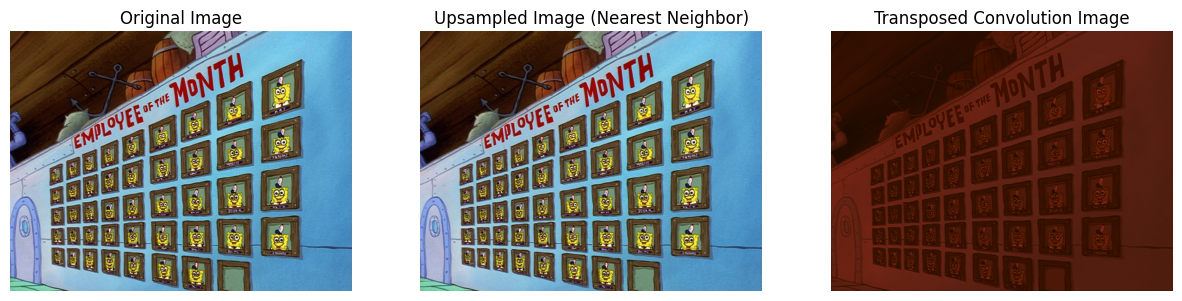

torch.Size([1, 3, 1080, 1423])
torch.Size([1, 3, 2160, 2846])
torch.Size([1, 3, 2162, 2848])


In [120]:
# 이미지 경로
image_path = 'data/_test_16.png'

# 실행
main(image_path)